In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly as py
import plotly.graph_objs as go
# from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv("assets/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
## Notes on Columns ##

#age
#sex
#cp: chest pain type (4 values)
#trestbps: resting blood pressure
#chol: serum cholestoral in mg/dl
#fbs: fasting blood sugar > 120 mg/dl
#restecg: resting electrocardiographic results (values 0,1,2)
#thalach: maximum heart rate achieved
#exang: exercise induced angina
#oldpeak: ST depression induced by exercise relative to rest
#slope: the slope of the peak exercise ST segment
#ca: number of major vessels (0-3) colored by flourosopy
#thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
#"target" field refers to the presence of heart disease in the patient. Integer valued 0 = no disease and 1 = disease.        

#The names and social security numbers of the patients were recently removed from the database,
#replaced with dummy values.



In [5]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Text(0.5, 1.0, 'Target(Heart Condition) vs Non-Target Count')

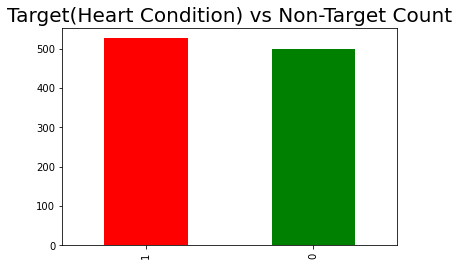

In [12]:
#Visulizing count of people with heart condition (target) vs without and check for balance of data.
df.target.value_counts().plot(kind="bar", color=["red", "green"])
plt.title(label="Target(Heart Condition) vs Non-Target Count",
          fontsize=20,
          color="black")

In [15]:
# Checking for messing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [77]:
categorical_value = []
continous_value = []
for column in df.columns:
    print('<><><><><><><><><><><><><><><><><><>')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_value.append(column)
    else:
        continous_value.append(column)

<><><><><><><><><><><><><><><><><><>
age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
<><><><><><><><><><><><><><><><><><>
sex : [1 0]
<><><><><><><><><><><><><><><><><><>
cp : [0 1 2 3]
<><><><><><><><><><><><><><><><><><>
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
<><><><><><><><><><><><><><><><><><>
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246


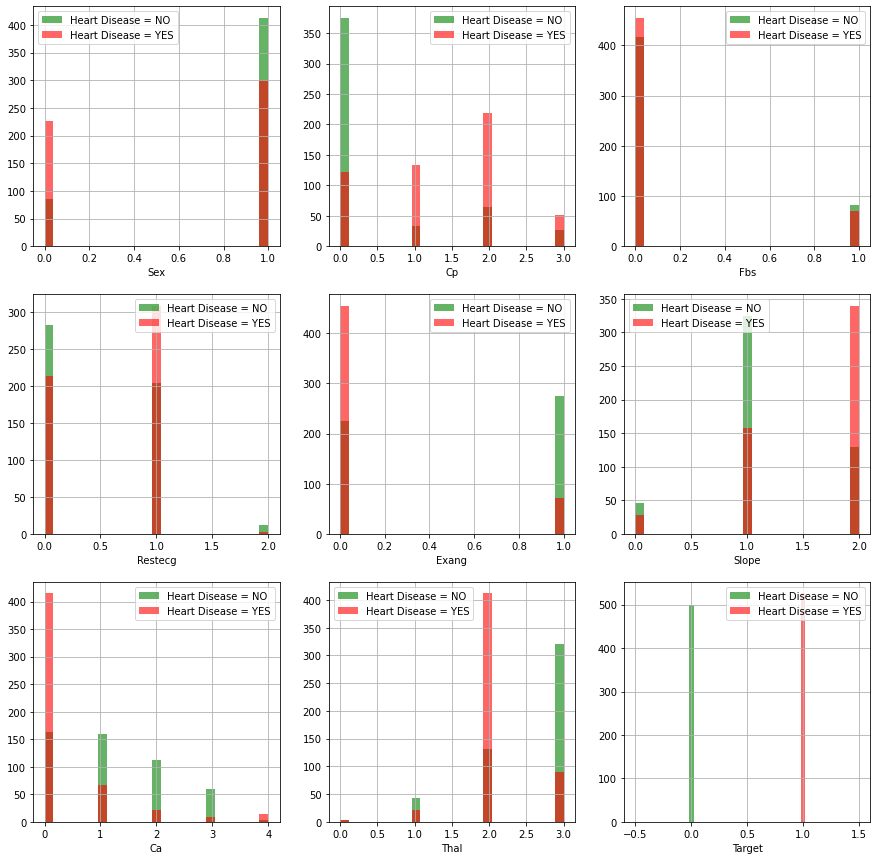

In [24]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_value, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=25, color='green', label='Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=25, color='red', label='Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column.capitalize())

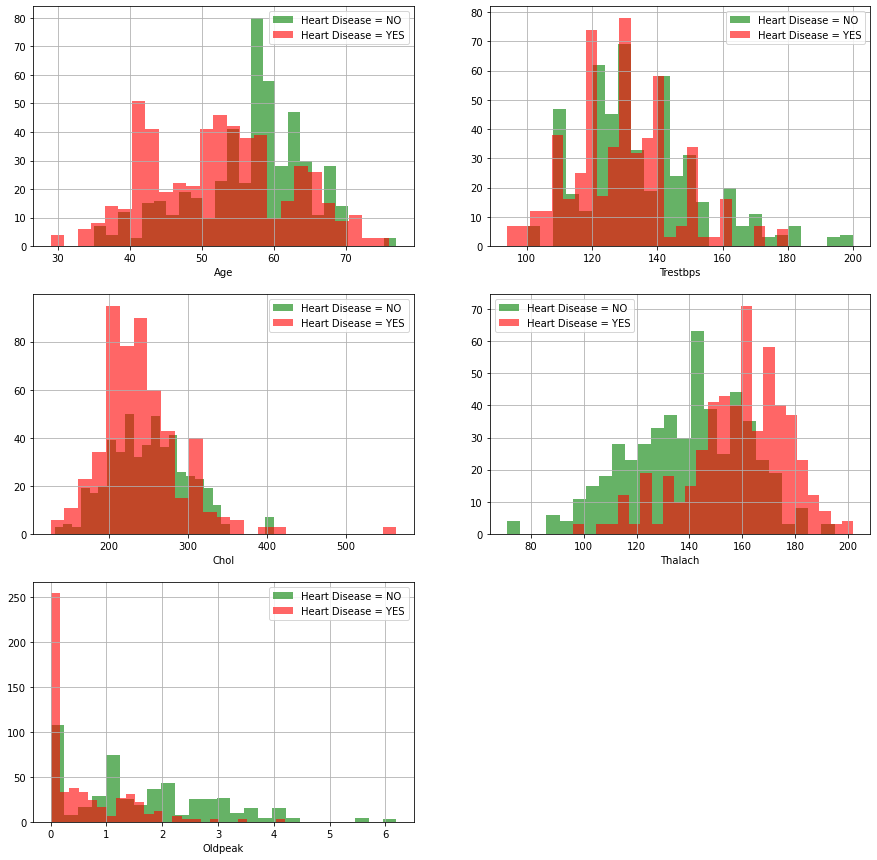

In [27]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_value, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=25, color='green', label='Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=25, color='red', label='Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column.capitalize())

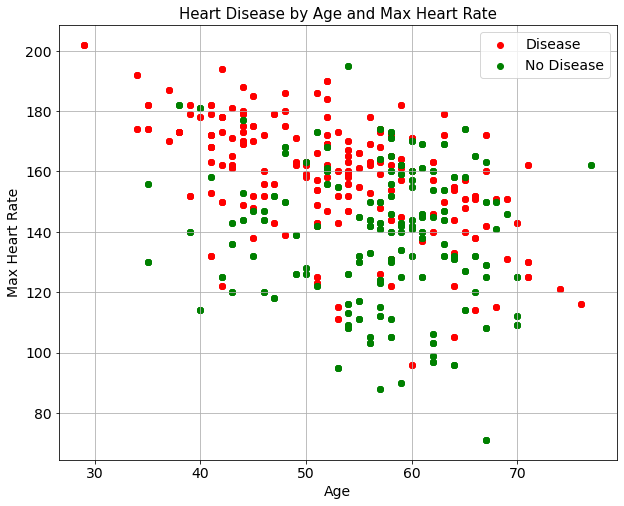

In [72]:
# Heart disease patients' max heart rate distribution in scatter plot to visualize danger zones
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="green")

# Add some helpful info
plt.title(label = "Heart Disease by Age and Max Heart Rate", fontsize = 15, color = "black")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);



(14.5, -0.5)

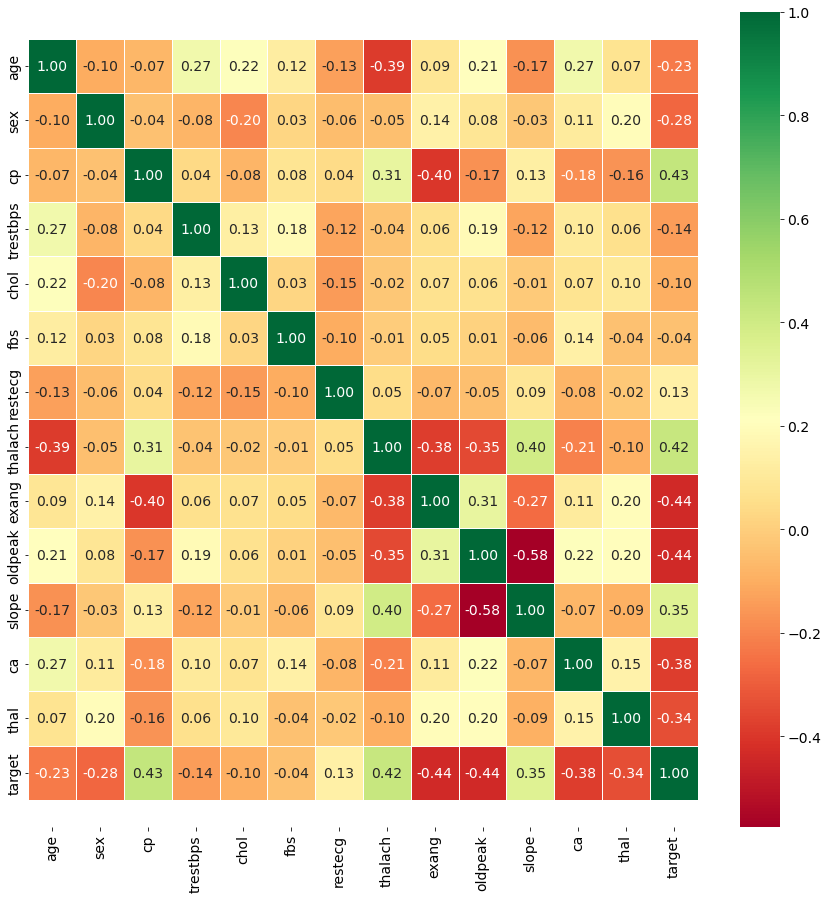

In [73]:
#Correlation matrix exercise - the chol having low correlation is surprising! Probably a quirk of this sample.
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdYlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

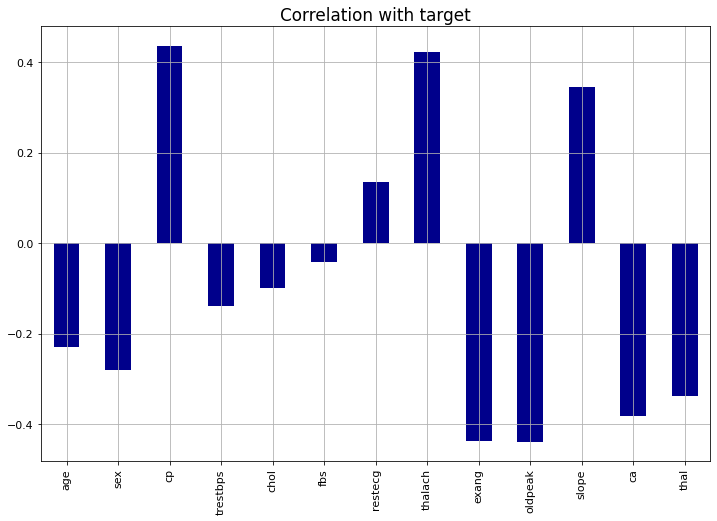

In [74]:
#Easier way to visualize correlation.
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8),color = 'darkblue', 
                                                   title="Correlation with target", fontsize=11)

In [78]:
categorical_value.remove('target')
dataset = pd.get_dummies(df, columns = categorical_value)

from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler()
column_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[column_to_scale] = std_scalar.fit_transform(dataset[column_to_scale])

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [80]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.54%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.89      0.90       0.90          0.90
recall      0.87   0.92      0.90       0.89          0.90
f1-score    0.89   0.90      0.90       0.89          0.90
support   340.00 377.00      0.90     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[295  45]
 [ 30 347]]

Test Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.85   0.79      0.82       0.82          0.82
recall      0.79   0.85      0.82       0.82          0.82
f1-score    0.82   0.82      0.82       0.82          0.82
support   159.00 149.00      0.82     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[125  34]
 [ 22 127]]



In [57]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.54,81.82


In [59]:
#Tree Model BELOW

In [60]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export_text
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
#from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

In [61]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export_text
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)

In [62]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.8344155844155844


In [63]:
confusion_matrix(y_test, dt_yhat, labels = [0, 1])

array([[115,  44],
       [  7, 142]])

In [65]:
#Random Forest

In [66]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [67]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.8571428571428571


In [68]:
#Winning method Random Forest with 85%